# Lecture 21: Word Embeddings

### Please note: This lecture will be recorded and made available for viewing online. If you do not wish to be recorded, please adjust your camera settings accordingly. 

# Reminders/Announcements:
- Assignment 7 has been collected. One homework assignment left!

## Last Time: Stylometry

We studied *how individuals use language*, and how that changes between different individuals. In particular, we studied things like 
- Distribution of sentence lengths
- Distribution of word lengths
- Distribution of word rates

In particular, we introduced the idea of a *classifier*: given a bunch of numeric data, predict a *category* that a data point belongs to. Since we rushed through it a bit, I just want to give an overview to contextualize it a bit more. 

We had 
- 51 papers which were *definitely written by Hamilton* (First category!)
- 15 papers which were *definitely written by Madison* (Second category!)
- 11 papers which were written by *Hamilton or Madison* (Unknown category!)

What did we do? We chose a list of *marker words*: on, upon, while, whilst, ... and noticed that different words were used with different frequencies when comparing Hamilton to Madison. To quantify this, we:
- Went through *each paper of Hamilton* and computed the *rate* that each of our marker words were used.
- Went through *each paper of Madison* and computed the *rate* that each of our marker words were used.

Then we told a "classifer" to "train itself" on the known papers. We essentially said:
- Hello classifier, this paper *was written by Hamilton* and look! It has a lot of instances of the marker word "while" in it
- Hello classifier, this paper *was written by Madison* and look! It has almost no instances of "while" but a lot of instances of "whilst"

The classifer then "teaches itself" that papers which use the word "while" are probably written by Hamilton and papers which use the word "whilst" are probably written by Madison. Then we
- Went through the *disputed papers* and computed the rates of the marker words
- Fed these rates into the classifier algorithm
- Learned that the classifier probably thought *Madison* was the author of the papers.

Different classifiers work in different ways, but this is the high level overview of what was going on. 

## This Time: Word Embeddings

Now we will transition a bit to studying *the language itself*, instead of how different authors *use the language*. Probably *the most* useful concept in this area is that of a *word embedding*. It works as follows.

Let $L$ be the *language* we are working with. This doesn't necessarily mean "English, French, etc." It means "all the words we currently care about." So for instance, we might pick $L$ to be:
- The words in the English Language (hot, cold, blue, ...), PLUS
- Common names (Thomas, Sarah, ...), PLUS
- Important companies (Gamestop, Nokia, ...), PLUS
- Important acronyms (FBI, CIA, ...), PLUS
- ...

Pick a positive integer $N$. A *word embedding of $L$* is simply a map 
$$
L\to \mathbb{R}^N.
$$



In discussing word embeddings, we will usually use the notion 
$$
w\to v_w,
$$
so 
$$
car\to v_{car}
$$

Seems simple enough! But, there are a few important things that we want to *try* and achieve with the map:
- "Similar" words should map to "similar" vectors
    - Chair, couch, sofa, and stool should be mapped to "close" vectors in $\mathbb{R}^N$
- "Dissimilar" words should map to "dissimilar" vectors
    - Be careful about "dissimilar" though! Up and down *are opposites*, but they are fairly similar words...
- N should be "big enough" to allow all the vectors to "spread out" and encode similarities between different things
- N should be "small enough" so that we can actually *compute* with these vectors!

## What does "similar" mean?

There are a few ways of measuring the "similarity" of two vectors. One that is common in machine learning is *cosine similarity*:
$$
sim(u,v) = \frac{u\cdot v}{|u||v|}.
$$
Explicitly, if $u = (u_1,\dots,u_N)$ and $v = (v_1,\dots,v_N)$, then 
$$
sim(u,v) = \frac{u_1v_1+\dots+u_Nv_N}{\sqrt{u_1^2+\dots+u_N^2}\sqrt{v_1^2+\dots+v_N^2}}
$$
This makes for a decent participation check!

## ****** Participation Check **********************************

Write a function which takes in two "vectors" (consider them as lists of numbers) u and v, and returns sim(u,v).

In [1]:
def sim(u,v):
    # Your code here
    uv = sum([u[i]*v[i] for i in range(len(u))])
    ul = sum([u[i]^2 for i in range(len(u))])^(1/2)
    vl = sum([v[i]^2 for i in range(len(v))])^(1/2)
    return(float(uv)/(ul*vl))


u = [1,2,3]
v = [-1,-2,-3]
print(sim(u,v))

u = [1,2,3]
v = [2,4,6]
print(sim(u,v))

-1.0
1.0


## ***************************************************************

Cosine similarity takes *no account* of the *size* of the vectors; it only measures *which direction the vectors are pointing*:

![](cos.png)

## A "Bad" Word Embedding

Let's order every word in $L$ alphabetically:

![](words.png)

We can define a "one hot embedding" by mapping the $i$th word in $L$ to the vector with a single $1$ in the $i$th index, and $0$ everywhere else:

![](words2.png)

Unfortunately this leads to some issues!

## ******** Participation Check ***********************

Give *two reasons* why the one-hot embedding is not a great word embedding (hint: look back at what we *want* out of a word embedding. Then look at the definition of cosine similarity. Also, how big do you think these vectors are?)

- Reason 1:
- Reason 2:

## ****************************************************

## Better Word Vectors

The current state of the art method for producing word vectors came out of work of several Googlers. The framework is known as *word2vec*, and you can see more here: https://en.wikipedia.org/wiki/Word2vec#CBOW_and_skip_grams

The general idea: "similar" words are used in "similar" contexts. Just like humans! Maybe you have heard the old proverb

>> Tell me your friends and I'll tell you who you are

If you have a lot of religious friends, it is *more likely* that you are religious. If you have a lot of friends from Michigan, it is *more likely* that you spent some of your life in Michigan. Etc.

Let's play a game! Think of a word that could complete this sentence. Type, *but do not send*, that word into the chat bar. We will try to all "simultaneously" send it so as to not influence anyone else.

![](food.png)

We all picked *somewhat* similar words! Certainly there was a lot of variation, but we all knew that the word we were looking for was:
- Edible (you *ate it*)
- A *specific type* of edible ("spicy")
- *Probably* a plural or "plural type" word!

From this we can learn that words like "tacos" or "curry" or "chili" are *somewhat similar*: they are "edible spicy pluralish food words"

We can also learn that words like "cars" and "blue" and "hockey" are *somewhat different* to tacos, chili, and curry. Cars would *never* be used to fill in that sentence!

This still seems somewhat lacking...but imagine how many sentences there are in the world! Imagine if I had provided you with this sentence instead:

![](food2.png)

We now know that we are looking for a dish *associated with India*! Could it be tacos? *Maybe*. Could it be kifto? *Maybe*. But *probably* it is a word like curry, vindaloo, rista, etc. We have thus separated the "edible spicy pluralish *Indian* words" from the "edible spicy pluralish *non-Indian*" words.

## Implementing this idea

I am not going to go over in detail how you can use this to get word vectors. But *basically* you:
- Extract a *bunch* of sentences from somewhere
    - Common sources: Wikipedia, database of news stories, ...
- Tell your computer to read the sentences ~5 words at a time (a "window")
- Have the computer "keep track" of which words appeared in similar windows

After doing this for hours and hours and hours on millions and millions and millions of sentences, the computer becomes *amazingly smart*.

The really cool thing is that we can access the results of their training! This involves first "downloading" a fairly large (~70 MB) file into CoCalc, so you may not be able to follow along right now:

In [2]:
import gensim.downloader

In [3]:
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50') #Uncomment if/when you want to come back and play with this, but you'll have a chance to do it on homework if you don't want to right now.

In [4]:
glove_vectors

In [5]:
len(glove_vectors.vocab)

400000

In [6]:
glove_vectors['Thomas']

KeyError: "word 'Thomas' not in vocabulary"

In [7]:
glove_vectors['thomas']

array([-0.10002 ,  0.58581 , -0.18892 , -0.78133 ,  0.56788 ,  0.77982 ,
       -1.2221  ,  0.29163 , -0.34162 , -1.2892  , -0.44901 ,  1.1249  ,
       -1.2433  , -0.99447 ,  0.28163 , -0.27078 ,  0.23618 , -1.1491  ,
       -0.82672 , -0.4048  , -0.098151, -0.067551, -0.32379 ,  0.20813 ,
       -0.048732, -1.6105  ,  0.084971, -0.83351 , -0.98128 ,  0.096412,
        1.2549  , -0.90291 ,  0.42223 , -0.44529 ,  0.24018 , -0.6333  ,
        0.26302 ,  0.49929 ,  0.7031  ,  0.11011 ,  0.94033 ,  0.82832 ,
       -0.15095 , -0.11306 ,  0.099107,  0.90746 , -0.13653 , -0.89517 ,
       -0.72975 ,  0.86626 ], dtype=float32)

In [8]:
glove_vectors['banana']

array([-0.25522 , -0.75249 , -0.86655 ,  1.1197  ,  0.12887 ,  1.0121  ,
       -0.57249 , -0.36224 ,  0.44341 , -0.12211 ,  0.073524,  0.21387 ,
        0.96744 , -0.068611,  0.51452 , -0.053425, -0.21966 ,  0.23012 ,
        1.043   , -0.77016 , -0.16753 , -1.0952  ,  0.24837 ,  0.20019 ,
       -0.40866 , -0.48037 ,  0.10674 ,  0.5316  ,  1.111   , -0.19322 ,
        1.4768  , -0.51783 , -0.79569 ,  1.7971  , -0.33392 , -0.14545 ,
       -1.5454  ,  0.0135  ,  0.10684 , -0.30722 , -0.54572 ,  0.38938 ,
        0.24659 , -0.85166 ,  0.54966 ,  0.82679 , -0.68081 , -0.77864 ,
       -0.028242, -0.82872 ], dtype=float32)

In [9]:
type(glove_vectors['banana'])

<class 'numpy.ndarray'>

In [10]:
len(glove_vectors['banana'])

50

In [11]:
glove_vectors.most_similar('banana')

[('bananas', 0.8152028322219849),
 ('coconut', 0.7872510552406311),
 ('pineapple', 0.757981538772583),
 ('mango', 0.7556401491165161),
 ('beet', 0.7212650179862976),
 ('fruit', 0.7181406617164612),
 ('sugar', 0.7180197834968567),
 ('growers', 0.7165752053260803),
 ('peanut', 0.7018108367919922),
 ('cranberry', 0.6957995295524597)]

In [12]:
glove_vectors.most_similar(['edible','spicy'])

[('tomato', 0.8521810173988342),
 ('fruit', 0.8491664528846741),
 ('vegetables', 0.8399223685264587),
 ('delicious', 0.8329547643661499),
 ('fruits', 0.8324853777885437),
 ('roasted', 0.82856285572052),
 ('spices', 0.8251430988311768),
 ('savory', 0.8186075091362),
 ('vegetable', 0.8137245178222656),
 ('soup', 0.8083689212799072)]

In [13]:
glove_vectors.most_similar('up')

[('down', 0.9523451924324036),
 ('out', 0.9315087795257568),
 ('while', 0.9285621047019958),
 ('back', 0.9047043919563293),
 ('off', 0.8998678922653198),
 ('put', 0.8958144187927246),
 ('just', 0.8927414417266846),
 ('away', 0.8920525908470154),
 ('over', 0.8814347386360168),
 ('to', 0.8726335763931274)]

In [14]:
glove_vectors.most_similar('curry')

[('bean', 0.7645796537399292),
 ('ginger', 0.750214159488678),
 ('pepper', 0.7419105172157288),
 ('cook', 0.7234705090522766),
 ('fry', 0.719668447971344),
 ('chili', 0.7026278376579285),
 ('onions', 0.6911578178405762),
 ('berry', 0.6713414788246155),
 ('rice', 0.6642091870307922),
 ('lemon', 0.6562460660934448)]

In [15]:
glove_vectors.most_similar('obama')

[('barack', 0.9674171805381775),
 ('bush', 0.9642481207847595),
 ('clinton', 0.9606046080589294),
 ('mccain', 0.912293553352356),
 ('dole', 0.8878743052482605),
 ('gore', 0.8848039507865906),
 ('hillary', 0.8776552081108093),
 ('rodham', 0.8401790857315063),
 ('kerry', 0.8261427879333496),
 ('biden', 0.8095825910568237)]

In [16]:
glove_vectors.most_similar('cia')

[('fbi', 0.8427013158798218),
 ('intelligence', 0.7883837819099426),
 ('informant', 0.7376471757888794),
 ('operative', 0.7352996468544006),
 ('covert', 0.7318969964981079),
 ('agents', 0.7244440913200378),
 ('pentagon', 0.7093384265899658),
 ('investigation', 0.6950873136520386),
 ('spy', 0.6949564218521118),
 ('investigators', 0.6905346512794495)]

In [17]:
glove_vectors.most_similar('ucsd')

[('ucsf', 0.7638055682182312),
 ('sdsu', 0.7081701755523682),
 ('ucsc', 0.6888858675956726),
 ('u.c.', 0.6857913732528687),
 ('tardelli', 0.6850271224975586),
 ('ucsb', 0.6842514872550964),
 ('concordia', 0.6812412738800049),
 ('fgv', 0.6811478734016418),
 ('eai', 0.671143651008606),
 ('uc', 0.6686808466911316)]

Let's do some crazy stuff now. Analogies! For students that didn't go through elementary school/middle school in the US, there is a common type of "test" that involves *analogies*:

- Word1 is to Word2 as Word3 is to __________

I think it is easiest to just give examples:

- MAN is to KING as WOMAN is to _________

In [18]:
glove_vectors.most_similar(positive = ['king','woman'], negative = ['man'])

[('queen', 0.8523603677749634),
 ('throne', 0.7664334177970886),
 ('prince', 0.759214460849762),
 ('daughter', 0.7473883032798767),
 ('elizabeth', 0.7460220456123352),
 ('princess', 0.7424569725990295),
 ('kingdom', 0.7337411642074585),
 ('monarch', 0.7214490175247192),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099430561065674)]

What happened here? You start with KING, and you want to "replace" the "manliness" of KING with "womanliness." But we have *vectors*; we can literally do this!

$$
v_{king} - v_{man} + v_{woman}
$$

In [19]:
glove_vectors['king'] - glove_vectors['man'] + glove_vectors['woman']

array([ 0.41736597,  0.90427005, -1.0050299 , -0.06202102,  0.49725997,
        0.80667007, -0.14855   ,  0.80365   , -0.15653998, -0.66973996,
        0.23435399,  0.62476   ,  0.925871  , -0.97099996,  0.92566   ,
        0.89915   , -1.54596   , -0.52625   ,  0.13695401,  0.66199005,
        0.4871601 ,  0.37035   , -0.214214  ,  0.10100996,  0.71358   ,
       -2.0874999 , -1.1362001 , -1.1496099 , -0.53599   ,  0.27389997,
        1.6723    ,  0.02930999, -0.77656007,  0.46056286,  0.34866   ,
       -0.05741701,  0.19444   , -0.207748  , -0.73038995, -0.10751998,
        0.235544  ,  0.96423995, -0.46993998, -0.48727497, -0.25399995,
        0.4621299 , -0.66081   , -1.9451499 , -0.68797004, -0.49784005],
      dtype=float32)

How good is this?

AMERICA is to AMERICAN as CHINA is to ___________

In [20]:
glove_vectors.most_similar(positive = ['american','china'], negative = ['america'])

[('chinese', 0.8827552199363708),
 ('taiwan', 0.8043252825737),
 ('korean', 0.8006567358970642),
 ('japanese', 0.7709087133407593),
 ('beijing', 0.7643234729766846),
 ('taiwanese', 0.7553259134292603),
 ('japan', 0.7499627470970154),
 ('asian', 0.7480012774467468),
 ('korea', 0.7438861131668091),
 ('mainland', 0.7313058376312256)]

OBAMA is to AMERICAN as PUTIN is to _________

In [21]:
glove_vectors.most_similar(positive = ['american','putin'], negative = ['obama'])

[('russian', 0.8495172262191772),
 ('soviet', 0.7639276385307312),
 ('ukrainian', 0.7484616041183472),
 ('french', 0.7267457246780396),
 ('polish', 0.7154698967933655),
 ('german', 0.7137736082077026),
 ('russia', 0.7072685360908508),
 ('dutch', 0.6925777196884155),
 ('canadian', 0.6919834613800049),
 ('cuban', 0.6899456977844238)]

BLUEBERRY is to BLUE as RASPBERRY is to ___________

In [22]:
glove_vectors.most_similar(positive = ['blue','raspberry'], negative = ['blueberry'])

[('red', 0.7710092067718506),
 ('purple', 0.7424114942550659),
 ('yellow', 0.7413184642791748),
 ('black', 0.7351616024971008),
 ('orange', 0.7255880236625671),
 ('golden', 0.7171742916107178),
 ('colored', 0.7114768624305725),
 ('pink', 0.7066935896873474),
 ('crimson', 0.7029789090156555),
 ('stripes', 0.7023863196372986)]

Of course it is not perfect...

UP is to DOWN as LEFT is to ___________

In [23]:
glove_vectors.most_similar(positive = ['down','left'], negative = ['up'])

[('broke', 0.8590975403785706),
 ('leaving', 0.8382939100265503),
 ('back', 0.8342666625976562),
 ('after', 0.8274049758911133),
 ('when', 0.8219099640846252),
 ('off', 0.8120282292366028),
 ('pulled', 0.8114712238311768),
 ('before', 0.8065346479415894),
 ('broken', 0.802820086479187),
 ('then', 0.7916644811630249)]

But I still think it's pretty cool.

In [24]:
glove_vectors.most_similar(positive = ['oooooooooo'])

[('oooooooooooooooooo', 0.9367011785507202),
 ('x.xx.xx.xx.x', 0.9230756759643555),
 ('ooooooooooooooo', 0.9122284650802612),
 ('oooooooooooooooooooo', 0.8784708976745605),
 ('oo.oo', 0.8721545934677124),
 ('oooooooooooooo', 0.8281261920928955),
 ('ooooo', 0.7913150191307068),
 ('oooooo', 0.7676581740379333),
 ('oooooooo', 0.7541344165802002),
 ('oooo', 0.7352308630943298)]

## Plots Plots Plots Plots Plots Plots (EVERYBODYYYYYYYYY)

Let's try some visualization (be careful; we are projecting from 50 dimensions to 2 dimensions, so this is a bit science fiction, but not too much)

In [25]:
import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
def reduce_to_2_dim(M):
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    svd = TruncatedSVD(n_components = 2, n_iter = n_iters, random_state = 42)
    M_reduced = svd.fit_transform(M)
    print("Done.")
    return M_reduced

def plot_embeddings(M_reduced,word2Ind, words):
    b = np.array([word2Ind[word] for word in words])
    x = M_reduced[b,0]
    y = M_reduced[b,1]
    plt.scatter(x,y)
    for i in range(len(words)):
        plt.annotate(words[i],(x[i],y[i]))

Running Truncated SVD over 10 words...
Done.


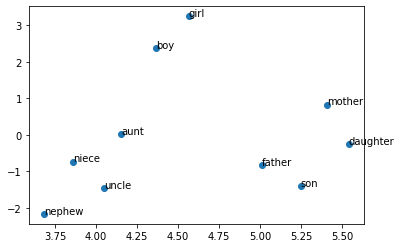

In [26]:
ws = ['boy','girl','father','mother','son','daughter','aunt','uncle','niece','nephew']
word2Ind = {ws[i]:i for i in range(len(ws))}
vs = np.asarray([glove_vectors[w] for w in ws])
M = reduce_to_2_dim(vs)
plot_embeddings(M,word2Ind,ws)

Note how there is a *linear trend* from the "male to female" version of each word. This is what makes the analogies possible.

Running Truncated SVD over 6 words...
Done.


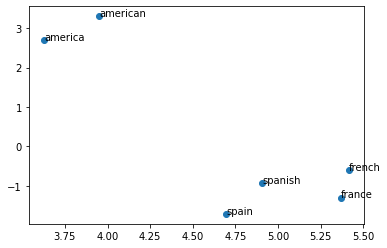

In [27]:
ws = ['america','american','france','french','spain','spanish']
word2Ind = {ws[i]:i for i in range(len(ws))}
vs = np.asarray([glove_vectors[w] for w in ws])
M = reduce_to_2_dim(vs)
plot_embeddings(M,word2Ind,ws)